### Import Libraries

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
tf.compat.v1.disable_eager_execution()

### Load Files

In [7]:
df = pd.read_csv("../Data/AI_Ready_DMSP_Data.csv")
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


In [23]:
df.shape

(1945887, 154)

In [24]:
df.info

<bound method DataFrame.info of                    Datetimes  SC_AACGM_LAT  SC_AACGM_LTIME  \
0        1987-01-12 12:57:00     51.143220        5.664024   
1        1987-01-12 12:58:00     54.137207        5.535848   
2        1987-01-12 13:01:00     62.928176        5.031172   
3        1987-01-12 13:02:00     65.719631        4.794780   
4        1987-01-12 13:03:00     68.392364        4.507448   
...                      ...           ...             ...   
1945882  2014-12-31 22:50:00     57.581441       19.667482   
1945883  2014-12-31 22:51:00     54.923541       19.585868   
1945884  2014-12-31 22:52:00     52.270565       19.512302   
1945885  2014-12-31 22:53:00     49.619169       19.445679   
1945886  2014-12-31 22:54:00     46.968849       19.385611   

         ELE_TOTAL_ENERGY_FLUX  ELE_TOTAL_ENERGY_FLUX_STD  ELE_AVG_ENERGY  \
0                 2.057827e+08                   0.411230        39.89341   
1                 2.509837e+08                   0.478268        40.8

In [8]:
df.columns= df.columns.str.lower()

In [7]:
df.describe()

,sc_aacgm_lat,sc_aacgm_ltime,ele_total_energy_flux,ele_total_energy_flux_std,ele_avg_energy,ele_avg_energy_std,id_sc,sin_ut,cos_ut,sin_doy,...,ae_5min,al_5min,au_5min,symh_5min,pc_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
count,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,...,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06
mean,6.570637e+01,1.216816e+01,3.482163e+11,3.808472e-01,6.766701e+02,5.215987e-01,1.525724e+01,-1.546309e-02,-5.730379e-04,-5.885964e-02,...,1.164216e+02,-6.775783e+01,4.866342e+01,-7.553068e+00,5.667985e-01,4.146902e+02,-4.136018e+02,1.714139e+00,1.830140e+04,2.584998e+03
std,1.113038e+01,6.183665e+00,9.502920e+13,3.843252e-01,1.643206e+03,5.285720e-01,1.859437e+00,7.043835e-01,7.096513e-01,6.857227e-01,...,1.140824e+02,8.255277e+01,4.434815e+01,1.239796e+01,9.291724e-01,8.636187e+01,8.614378e+01,1.139435e+00,1.569150e+04,2.213171e+03
min,4.500001e+01,5.522087e-05,2.632692e+06,4.849234e-02,3.000000e+01,6.364828e-02,6.000000e+00,-1.000000e+00,-1.000000e+00,-9.999907e-01,...,2.000000e+00,-1.014000e+03,-2.900000e+01,-1.350000e+02,-8.310000e+00,2.097000e+02,-8.948000e+02,2.000000e-02,0.000000e+00,0.000000e+00
25%,5.639841e+01,7.020661e+00,1.695103e+08,1.498974e-01,4.673054e+01,1.985475e-01,1.300000e+01,-7.163019e-01,-7.132504e-01,-7.176769e-01,...,4.000000e+01,-8.900000e+01,1.800000e+01,-1.400000e+01,1.000000e-02,3.515000e+02,-4.582000e+02,1.030000e+00,6.125974e+03,6.412949e+02
50%,6.683312e+01,1.059154e+01,5.541485e+08,2.598311e-01,9.489876e+01,3.600449e-01,1.500000e+01,-3.053851e-02,-1.836970e-16,-1.116590e-01,...,7.200000e+01,-3.300000e+01,3.400000e+01,-7.000000e+00,4.100000e-01,4.003000e+02,-3.992000e+02,1.440000e+00,1.485265e+04,2.092684e+03
75%,7.455943e+01,1.795850e+01,1.304165e+10,4.544635e-01,4.302134e+02,6.252084e-01,1.700000e+01,6.883546e-01,7.132504e-01,6.152846e-01,...,1.540000e+02,-1.600000e+01,6.500000e+01,0.000000e+00,1.060000e+00,4.595000e+02,-3.506000e+02,2.070000e+00,2.641958e+04,4.088414e+03
max,8.998340e+01,2.399989e+01,5.648257e+16,8.695798e+00,3.000000e+04,1.210898e+01,1.800000e+01,1.000000e+00,1.000000e+00,9.999907e-01,...,1.262000e+03,4.000000e+01,4.910000e+02,1.010000e+02,1.432000e+01,9.033000e+02,-2.088000e+02,4.576000e+01,9.997738e+04,8.999590e+03


In [58]:
df.isnull().sum().sum()

0

> There are no null values in the dataset.

In [9]:
for i in df.columns:
    print(i," => ",df[i].unique())

datetimes  =>  ['1987-01-12 12:57:00' '1987-01-12 12:58:00' '1987-01-12 13:01:00' ...
 '2014-12-29 07:02:00' '2014-12-31 19:31:00' '2014-12-31 22:53:00']
sc_aacgm_lat  =>  [51.14321959 54.1372069  62.92817596 ... 52.27056506 49.61916902
 46.96884909]
sc_aacgm_ltime  =>  [ 5.66402438  5.53584766  5.03117197 ... 19.51230158 19.44567945
 19.3856115 ]
ele_total_energy_flux  =>  [2.057827e+08 2.509837e+08 4.469146e+08 ... 1.917582e+08 2.265864e+08
 1.160843e+09]
ele_total_energy_flux_std  =>  [0.4112298 0.4782681 0.6033621 ... 0.2218383 0.203549  1.576839 ]
ele_avg_energy  =>  [ 39.89341  40.82392 143.7736  ...  42.31005  41.81216 221.8953 ]
ele_avg_energy_std  =>  [0.4114848 0.4785683 0.6040235 ... 0.2999959 0.2780644 1.5898   ]
id_sc  =>  [ 6.  7.  8.  9. 12. 13. 14. 15. 16. 17. 18.]
sin_ut  =>  [-0.24615329 -0.25038    -0.26303121 ...  0.65934582  0.69465837
  0.52249856]
cos_ut  =>  [-0.96923091 -0.96814764 -0.96478732 ... -0.7193398  -0.21217767
 -0.85264016]
sin_doy  =>  [ 2.05104500e

>There are no null values in disguise too. So its good to proceed with knowing the data.

In [10]:
for i in df.columns:
    if(df[i].nunique==1):
        print(i," has only value as ",df[i].unique())
    else:
        print(i," has ",df[i].nunique()," values.")


datetimes  has  1387541  values.
sc_aacgm_lat  has  1945887  values.
sc_aacgm_ltime  has  1945887  values.
ele_total_energy_flux  has  1408105  values.
ele_total_energy_flux_std  has  1218045  values.
ele_avg_energy  has  1312051  values.
ele_avg_energy_std  has  1253387  values.
id_sc  has  11  values.
sin_ut  has  1215  values.
cos_ut  has  1226  values.
sin_doy  has  366  values.
cos_doy  has  310  values.
sin_sc_aacgm_ltime  has  1945887  values.
cos_sc_aacgm_ltime  has  1945887  values.
f107  has  1327  values.
bz  has  2565  values.
by  has  3204  values.
bx  has  2658  values.
ae  has  905  values.
al  has  752  values.
au  has  428  values.
symh  has  196  values.
pc  has  1136  values.
vsw  has  5212  values.
vx  has  5180  values.
psw  has  1276  values.
borovsky  has  332783  values.
newell  has  332726  values.
f107_6hr  has  9835  values.
bz_6hr  has  46570  values.
by_6hr  has  54528  values.
bx_6hr  has  45086  values.
ae_6hr  has  9055  values.
al_6hr  has  6920  values

> Every column has more than 1 unique values

In [9]:
num_cols = df.select_dtypes(exclude=['object'])
cat_cols = df.select_dtypes(include=['object'])

In [10]:
print("Numerical columns: ",num_cols.shape[1])
print("Categorical columns: ",cat_cols.shape[1])

Numerical columns:  153
Categorical columns:  1


In [13]:
cat_cols

,datetimes
0,1987-01-12 12:57:00
1,1987-01-12 12:58:00
2,1987-01-12 13:01:00
3,1987-01-12 13:02:00
4,1987-01-12 13:03:00
...,...
1945882,2014-12-31 22:50:00
1945883,2014-12-31 22:51:00
1945884,2014-12-31 22:52:00
1945885,2014-12-31 22:53:00


In [11]:
df['date'] = pd.to_datetime(df['datetimes'])
df['time'] = pd.to_datetime(df['datetimes'])

In [12]:
df['date'] = df['date'].dt.strftime('%y%m%d')
df['time'] = df['time'].dt.strftime('%H%M')
df.drop_duplicates(inplace=True)
df.drop('datetimes',axis =1, inplace=True)

In [13]:
df.head()

,sc_aacgm_lat,sc_aacgm_ltime,ele_total_energy_flux,ele_total_energy_flux_std,ele_avg_energy,ele_avg_energy_std,id_sc,sin_ut,cos_ut,sin_doy,...,au_5min,symh_5min,pc_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min,date,time
0,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,0.205104,...,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963,870112,1257
1,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,0.205104,...,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963,870112,1258
2,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,0.205104,...,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,870112,1301
3,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,0.205104,...,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,870112,1302
4,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,0.205104,...,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015,870112,1303


In [17]:
df.shape

(1945887, 155)

In [14]:
ddf = df.copy()

In [15]:
y=ddf['ele_total_energy_flux']
X=ddf.drop('ele_total_energy_flux',axis =1, inplace=False)

In [16]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_regression


print("Old Shape: ",X.shape)
extractor = SelectKBest(f_regression, k=20)
X_new = extractor.fit_transform(X, y)
print("New Shape: ",X_new.shape)


Old Shape:  (1945887, 154)
New Shape:  (1945887, 20)


In [37]:
features = extractor.get_feature_names_out()

In [29]:
import pickle 
open_file = open("../Data/featuresf", "wb")
pickle.dump(features, open_file)
open_file.close()

In [32]:
X_new[0:5]

array([[0.4112298, 39.89341, 0.4114848, 6.0, -0.246153293028993,
        0.2051044998686192, 68.9, 68.89999999999999, 68.89999999999999,
        68.89999999999999, 68.89999999999999, 4.96, 68.9, 6.06, 68.9,
        7.67, 68.9, 68.9, 68.9, '870112'],
       [0.4782681, 40.82392, 0.4785683, 6.0, -0.2503800040544415,
        0.2051044998686192, 68.9, 68.89999999999999, 68.89999999999999,
        68.89999999999999, 68.89999999999999, 4.96, 68.9, 6.06, 68.9,
        7.67, 68.9, 68.9, 68.9, '870112'],
       [0.6033621, 143.7736, 0.6040234999999999, 6.0,
        -0.2630312144579745, 0.2051044998686192, 68.9, 68.89999999999999,
        68.89999999999999, 68.89999999999999, 68.89999999999999,
        5.083333333333333, 68.9, 5.58, 68.9, 7.16, 68.9, 68.9, 68.9,
        '870112'],
       [0.1036476999999999, 820.3656, 0.1036711, 6.0,
        -0.2672383760782568, 0.2051044998686192, 68.9, 68.89999999999999,
        68.89999999999999, 68.89999999999999, 68.89999999999999,
        5.083333333333333

In [65]:
data = pd.DataFrame(df['ele_total_energy_flux'])
for col in features:
    data[col] = df[col].copy()

In [32]:
data.head()

,ele_total_energy_flux,ele_total_energy_flux_std,ele_avg_energy,ele_avg_energy_std,id_sc,sin_ut,sin_doy,f107,f107_6hr,f107_5hr,...,f107_1hr,by_1hr,f107_45min,by_45min,f107_30min,by_30min,f107_15min,f107_10min,f107_5min,date
0,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,0.205104,68.9,68.9,68.9,...,68.9,4.960000,68.9,6.06,68.9,7.67,68.9,68.9,68.9,870112
1,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,0.205104,68.9,68.9,68.9,...,68.9,4.960000,68.9,6.06,68.9,7.67,68.9,68.9,68.9,870112
2,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,0.205104,68.9,68.9,68.9,...,68.9,5.083333,68.9,5.58,68.9,7.16,68.9,68.9,68.9,870112
3,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,0.205104,68.9,68.9,68.9,...,68.9,5.083333,68.9,5.58,68.9,7.16,68.9,68.9,68.9,870112
4,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,0.205104,68.9,68.9,68.9,...,68.9,5.083333,68.9,5.58,68.9,7.16,68.9,68.9,68.9,870112


<AxesSubplot:>

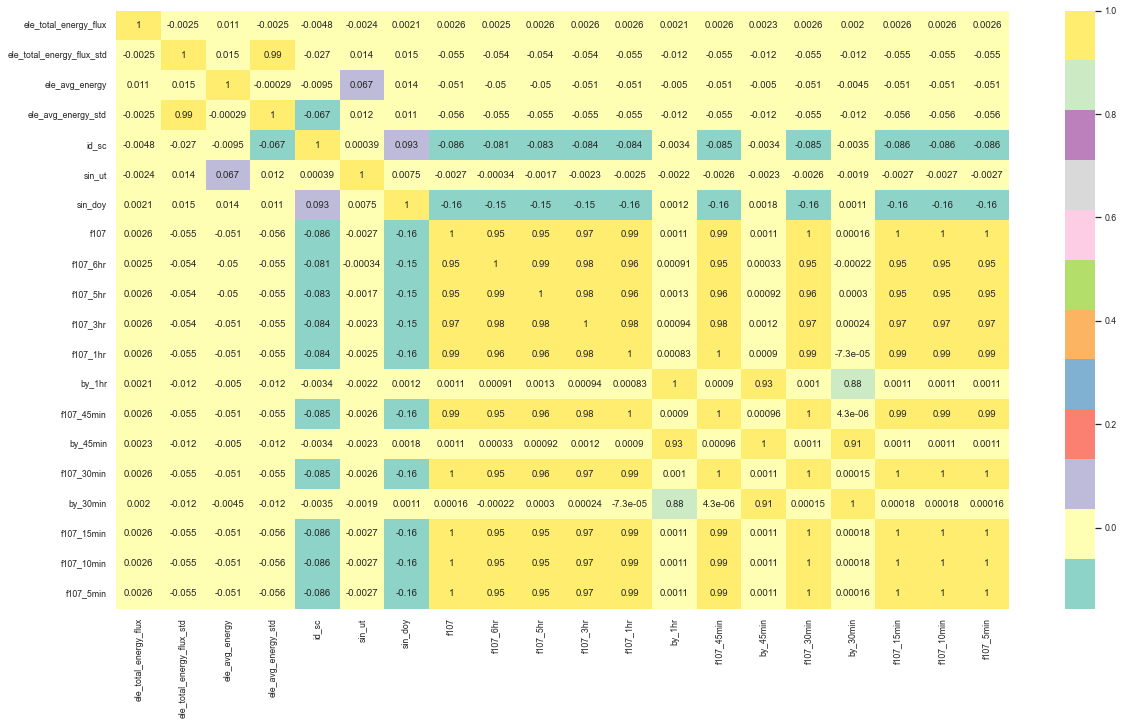

In [33]:
plt.figure(figsize=(20,11))
sns.set(font_scale=0.8)
sns.heatmap(data.corr(), annot=True, cmap = 'Set3')


from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X_new)  # fit does nothing.
X = transformer.transform(X_new)


In [17]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler().fit(X_new)
Feature = scaler.transform(X_new)

In [67]:
import joblib
joblib.dump(scaler, '../Model/scalerf.joblib')
joblib.dump(scaler, '../Model/scalerf.pkl')


['../Model/scalerf.pkl']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Feature, y, test_size=0.2, random_state=42)

### Baseine Model

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import models ,layers

In [37]:
b_model=[]
b_model = keras.Sequential()
b_model.add(layers.Dense(40, activation='tanh', kernel_initializer='normal',input_shape=(X_train.shape[1],)))
b_model.add(layers.Dense(10, activation='tanh', kernel_initializer='normal'))
#b_model.add(layers.Dropout(0.1))
b_model.add(layers.Dense(1, kernel_initializer='normal',activation='linear'))

b_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                840       
                                                                 
 dense_1 (Dense)             (None, 10)                410       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


In [39]:
b_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])

In [40]:
from keras.callbacks import ModelCheckpoint

ckpt_name = 'FWeight-{epoch:02d}--{val_loss:.4f}.hdf5' 
ckpt = ModelCheckpoint(ckpt_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [ckpt]

In [41]:
history = b_model.fit(X_train, y_train, epochs=400, batch_size=40, validation_split = 0.2, callbacks=callbacks_list, verbose=0)

C:\Users\deepn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 5220283646675710933645393920.00000, saving model to FWeight-01--5220283646675710933645393920.0000.hdf5

Epoch 2: val_loss improved from 5220283646675710933645393920.00000 to 5220283640240548652225921024.00000, saving model to FWeight-02--5220283640240548652225921024.0000.hdf5

Epoch 3: val_loss improved from 5220283640240548652225921024.00000 to 5220283638333119178894999552.00000, saving model to FWeight-03--5220283638333119178894999552.0000.hdf5

Epoch 4: val_loss improved from 5220283638333119178894999552.00000 to 5220283627971391967478153216.00000, saving model to FWeight-04--5220283627971391967478153216.0000.hdf5

Epoch 5: val_loss did not improve from 5220283627971391967478153216.00000

Epoch 6: val_loss did not improve from 5220283627971391967478153216.00000

Epoch 7: val_loss did not improve from 5220283627971391967478153216.00000

Epoch 8: val_loss did not improve from 5220283627971391967478153216.00000

Epoch 9: val_loss did not improve 

In [52]:
print(b_model.evaluate(X_train, y_train, verbose=0))

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder:0", shape=(), dtype=float32) is not an element of this graph.

In [42]:
b_model.load_weights("FWeight-150--5220283456128910977390346240.0000.hdf5")
ls1 = b_model.evaluate(X_train, y_train, verbose=0)
print("Loss = ",np.sqrt(ls1))

Loss =  [9.64700715e+13 9.64698439e+13]


### Hyper-Tuning Parameters

In [70]:
def model_builder(hp):
    model_fine_tuner=[]
    model_fine_tuner = keras.Sequential()
    hp_units = hp.Int('units', min_value=16, max_value=30, step=2)
    model_fine_tuner.add(layers.Dense(40, activation='tanh', kernel_initializer='normal',input_shape=(X_train.shape[1],)))
    model_fine_tuner.add(layers.Dense(30, activation='tanh', kernel_initializer='normal'))
    model_fine_tuner.add(keras.layers.Dense(1,activation='linear'))
    hp_lr = hp.Choice('learning-rate', values=[0.4,0.5,0.6,0.7,0.8])
    model_fine_tuner.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_lr), loss='mean_squared_error',metrics=['mean_squared_error'])
    return model_fine_tuner

In [71]:
import keras_tuner as kt
from keras_tuner import HyperModel

tune= kt.Hyperband(model_builder, max_epochs=10, objective='mean_squared_error', seed=42, executions_per_trial=2, directory='fdir')

In [72]:
tune.search_space_summary(extended=True) 

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 30, 'step': 2, 'sampling': None}
learning-rate (Choice)
{'default': 0.4, 'conditions': [], 'values': [0.4, 0.5, 0.6, 0.7, 0.8], 'ordered': True}


In [73]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tune.search(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[stop_early] )

Trial 30 Complete [00h 12m 13s]
mean_squared_error: 1.1538846902806093e+28

Best mean_squared_error So Far: 1.153884099984799e+28
Total elapsed time: 07h 29m 11s
INFO:tensorflow:Oracle triggered exit


In [74]:
tune.results_summary()

Results summary
Results in fdir\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 24
learning-rate: 0.8
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 1.153884099984799e+28
Trial summary
Hyperparameters:
units: 22
learning-rate: 0.6
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.15388415901438e+28
Trial summary
Hyperparameters:
units: 30
learning-rate: 0.8
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.15388415901438e+28
Trial summary
Hyperparameters:
units: 22
learning-rate: 0.5
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 1.153884277073542e+28
Trial summary
Hyperparameters:
units: 22
learning-rate: 0.5
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.153884336103123e+28
Trial summary
Hyperparameters:
units: 28
learning-rate: 0.7
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/br

### Final Model

In [20]:
from tensorflow import keras
import keras_tuner as kt

from keras.callbacks import ModelCheckpoint
from keras_tuner import HyperModel

In [24]:
final_model = keras.Sequential()
final_model.add(layers.Dense(40, activation='tanh', kernel_initializer='normal',input_shape=(X_train.shape[1],)))
final_model.add(layers.Dense(24, activation='tanh', kernel_initializer='normal'))
final_model.add(keras.layers.Dense(1,activation='linear'))
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.8), loss='mean_squared_error',metrics=['mean_squared_error'])

In [25]:
ckpt_name = 'FW-{epoch:03d}--{val_loss:.5f}.hdf5' 
ckpt = ModelCheckpoint(ckpt_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [ckpt]

In [26]:
history = final_model.fit(X_train, y_train, epochs=20, validation_split = 0.2, callbacks=callbacks_list, verbose=0)


Epoch 1: val_loss improved from inf to 5220283762488159092686716928.00000, saving model to FW-001--5220283762488159092686716928.00000.hdf5

Epoch 2: val_loss did not improve from 5220283762488159092686716928.00000

Epoch 3: val_loss did not improve from 5220283762488159092686716928.00000

Epoch 4: val_loss did not improve from 5220283762488159092686716928.00000

Epoch 5: val_loss did not improve from 5220283762488159092686716928.00000

Epoch 6: val_loss did not improve from 5220283762488159092686716928.00000

Epoch 7: val_loss improved from 5220283762488159092686716928.00000 to 5220283759105500574717575168.00000, saving model to FW-007--5220283759105500574717575168.00000.hdf5

Epoch 8: val_loss did not improve from 5220283759105500574717575168.00000

Epoch 9: val_loss did not improve from 5220283759105500574717575168.00000

Epoch 10: val_loss improved from 5220283759105500574717575168.00000 to 5220283730201298110695604224.00000, saving model to FW-010--5220283730201298110695604224.000

In [27]:
print(final_model.evaluate(X_train, y_train, verbose=0))

[9.306474699218432e+27, 9.306431e+27]


In [28]:
final_model.load_weights("FW-010--5220283730201298110695604224.00000.hdf5")
print("RMSE = ",np.sqrt(final_model.evaluate(X_train, y_train, verbose=0)[0]))

RMSE =  96470071520843.75


In [29]:
final_model.save('../Model/DL_DMSP.h5')

In [32]:
joblib.dump(final_model, '..\Model\DL_DMSPF.pkl')

INFO:tensorflow:Assets written to: ram://ff957424-a68e-4c65-b4b7-6f0103436fe5/assets


['..\\Model\\DL_DMSPF.pkl']

In [34]:

with open('../Model/DL_DMSPF.joblib', 'wb') as f:
    joblib.dump(final_model,f,compress=5)

INFO:tensorflow:Assets written to: ram://6e9c523b-68e9-43b5-94ee-16204f24e2d7/assets


In [81]:
from sklearn.metrics import mean_squared_error

pred_train1= b_model.predict(X_train)
mse_train1 = np.sqrt(mean_squared_error(y_train,pred_train1))

pred1= b_model.predict(X_test)
mse_test1 = np.sqrt(mean_squared_error(y_test,pred1))

pred_train2= final_model.predict(X_train)
mse_train2 = np.sqrt(mean_squared_error(y_train,pred_train2))

pred2= final_model.predict(X_test)
mse_test2 = np.sqrt(mean_squared_error(y_test,pred2))

In [82]:
print("====Training Loss====")
print("Base Model -> ",mse_train1)
print("Final Model -> ",mse_train2)
print("====Testing Loss====")
print("Base Model -> ",mse_test1)
print("Final Model -> ",mse_test2)

====Training Loss====
Base Model ->  96470070932223.17
Final Model ->  96470070896579.97
====Testing Loss====
Base Model ->  89036146293260.11
Final Model ->  89036146261803.77


96470070896579.97
89036146261803.77
14 digit mse

### Explainable SHAP

In [35]:

import shap
shap.initjs()


In [38]:
S = pd.DataFrame(data=X_train, columns=features)
S.head()

,ele_total_energy_flux_std,ele_avg_energy,ele_avg_energy_std,id_sc,sin_ut,sin_doy,f107,f107_6hr,f107_5hr,f107_3hr,f107_1hr,by_1hr,f107_45min,by_45min,f107_30min,by_30min,f107_15min,f107_10min,f107_5min,date
0,-0.304888,-0.369331,-0.234058,-1.213937,1.360203,-0.634245,2.122184,2.076021,2.093019,2.102343,2.107790,-1.895136,2.110243,-1.526717,2.114771,-1.649404,2.120708,2.121714,2.122146,-1.287750
1,0.132076,-0.359178,-0.036785,0.937252,0.800354,1.443125,0.018856,-0.084664,-0.084394,-0.084222,0.018003,0.703407,0.018199,0.761889,0.018447,0.687598,0.018755,0.018790,0.018842,1.128892
2,0.543674,-0.373645,0.616881,-0.138343,1.415551,1.544138,-0.677885,-0.666551,-0.670786,-0.673079,-0.674252,0.129620,-0.674804,0.304168,-0.675974,0.304745,-0.677531,-0.677818,-0.677892,-0.290461
3,0.178194,-0.348521,-0.094149,1.475049,1.313808,0.922577,-0.559942,-0.709337,-0.713903,-0.556173,-0.557068,0.325771,-0.557493,0.234977,-0.558423,0.182444,-0.559665,-0.559897,-0.559949,0.725598
4,-0.588633,-0.389670,-0.567257,1.475049,-0.463607,-0.441657,-0.586151,-0.576701,-0.580240,-0.582152,-0.583109,0.129620,-0.583562,0.032728,-0.584545,0.320697,-0.585857,-0.586101,-0.586159,0.729571


In [58]:
explainer = shap.KernelExplainer(final_model.predict,X_train[0:50])

In [64]:
shap_values = explainer.shap_values(X_train[0:100])
shap_values

  0%|          | 0/100 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  1%|          | 1/100 [00:01<03:03,  1.85s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipelin

[array([[ 1.83154573,  1.62164568,  1.97968707, ...,  0.        ,
          0.8917784 ,  1.69450822],
        [ 5.66588957,  3.25303375, -1.10745262, ..., -1.92192767,
          0.        ,  0.        ],
        [ 0.31258096,  0.        ,  0.        , ...,  0.77513074,
          1.43590306,  1.80666167],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.40648603,  0.39666694, ...,  0.        ,
         -1.03582163,  0.45018922],
        [-2.57760193,  0.        , -1.62403804, ...,  2.6964754 ,
          0.        ,  2.76964771]])]

In [60]:
joblib.dump(X_train[:50], '../Data/ex_data.pkl')

['../Data/ex_data.pkl']

In [61]:
with open('../Model/explainer.joblib', 'wb') as f:
    joblib.dump(explainer,f,compress=5)

INFO:tensorflow:Assets written to: ram://c2713c60-f485-43b0-825f-58902fa27979/assets


In [62]:
joblib.dump(explainer, '..\Model\explainer.pkl')

INFO:tensorflow:Assets written to: ram://07d3c80a-de20-47b5-9325-c6c6271ed7c8/assets


['..\\Model\\explainer.pkl']

In [65]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train[30,:], plot_cmap="PkYg")

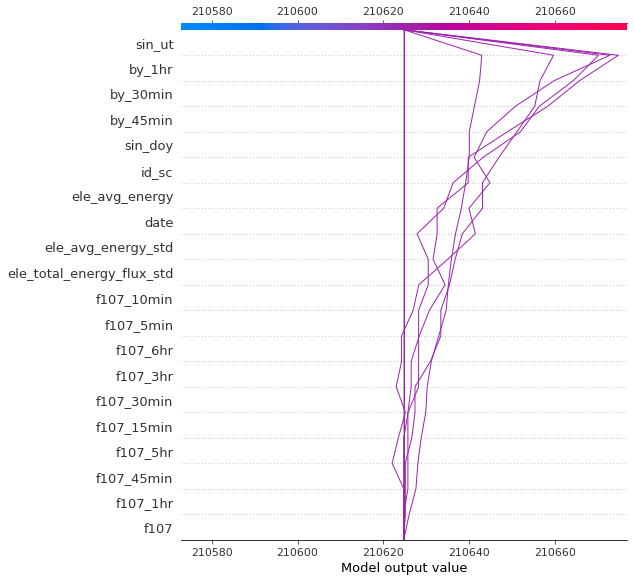

In [68]:
shap.decision_plot(explainer.expected_value, shap_values[0][45:55], 
    features = X_train[45:55,:], feature_names = list(features))